In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pachner_traversal.utils import compute_rhat, data_path, set_style

set_style()

In [74]:
folder = "number_of_generators"
save_name = 'sim_annealing_gen.pdf'

result_path = data_path / "results" / "sim_annealing" / folder / "20251018_1802"
assert result_path.exists()

In [75]:
df = pd.read_csv(result_path / "progress.csv", index_col=0)

In [76]:
df[df.index.str.startswith("E")].idxmax()['score']

'ELMvLAAvMAQzLwPLAMMMPcbdgfiihnmloopnqtsvtxwyzyABACDDaaaavlsvaccfbxsaqranmglanxxnxxr'

In [77]:
prev_iso = None

changes = 0

for next_iso in df.index:
    if prev_iso != next_iso:
        changes += 1
    prev_iso = next_iso

In [78]:
changes / len(df)

0.2011

In [79]:
score_df = pd.read_csv(result_path / "scores.csv", index_col=0)
best_iso = score_df[score_df.index.str.startswith("E")].idxmax()['score']
score_df.loc[best_iso]

score    2.645161
Name: ELMvLAAvMAQzLwPLAMMMPcbdgfiihnmloopnqtsvtxwyzyABACDDaaaavlsvaccfbxsaqranmglanxxnxxr, dtype: float64

In [80]:
betas_df = pd.read_csv(result_path / "betas.csv")

In [81]:
tet_map = {
    l: i for i, l in enumerate("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
}

In [82]:
def get_scores_df(result_path):
    isos_df = pd.read_csv(result_path / "isos.csv")
    scores_df = pd.read_csv(result_path / "scores.csv", index_col=0)

    scores_series = scores_df['score']
    scores_map = scores_series.to_dict()

    chain_scores_df = isos_df.apply(lambda x: x.map(scores_map), axis=1)
    return chain_scores_df

In [83]:
chain_scores_df = get_scores_df(result_path)

In [85]:
chain_scores_df

,0
0,1.333333
1,1.333333
2,1.500000
3,1.222222
4,1.125000
...,...
9996,2.500000
9997,2.500000
9998,2.500000
9999,2.500000


In [86]:
df['score'][df.index.str.startswith("E")].max()

np.float64(2.6451612903225805)

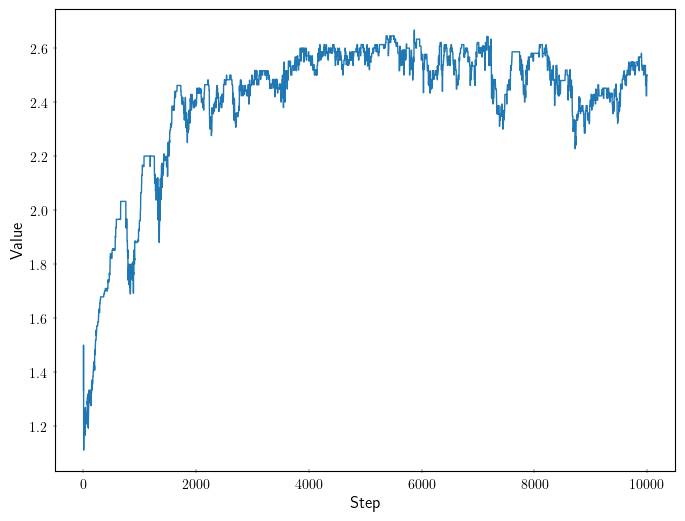

In [87]:
fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(chain_scores_df.iloc[:, chain_scores_df.max().argmax()])
ax.plot(df['score'].values)

plt.xlabel("Step")
plt.ylabel("Value")
plt.savefig(data_path.parent / 'thesis' / 'figures' / save_name, bbox_inches="tight")
plt.show()